# MANTENIMIENTO PREDICTIVO EN MOTORES DE AVIÓN

# NO SUPERVISADO K-MEANS Y PCA

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import joblib



In [6]:
df= pd.read_csv('../data/processed/datos_norm_limpios.csv', delimiter=',')

df

,id,cycle,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
0,1,1,0.183735,0.406802,0.309757,0.726248,0.242424,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191.0,0,0
1,1,2,0.283133,0.453019,0.352633,0.628019,0.212121,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190.0,0,0
2,1,3,0.343373,0.369523,0.370527,0.710145,0.272727,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189.0,0,0
3,1,4,0.343373,0.256159,0.331195,0.740741,0.318182,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188.0,0,0
4,1,5,0.349398,0.257467,0.404625,0.668277,0.242424,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [7]:
class_counts = df['label2'].value_counts()
class_counts

label2
0    17531
2     1600
1     1500
Name: count, dtype: int64

Después de ver las predicciones para label2 se intentam mejorar quitando datos en los que label2=0. Se elige quitar un porcentaje de cada ID (motor) del comienzo de los datos.

Se prueba con diferentes porcentajes y se elige lo siguiente:

In [8]:
df['cumcount'] = df.groupby('id').cumcount()
df_filtered = df[df['cumcount'] >= df['cumcount'].max() * 0.2]
df_filtered = df_filtered.drop(columns='cumcount')
df_filtered

,id,cycle,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
73,1,74,0.527108,0.296708,0.324612,0.673108,0.257576,0.434524,0.759062,0.132353,0.168903,0.340900,0.333333,0.511628,0.673571,118.0,0,0
74,1,75,0.225904,0.245912,0.212188,0.603865,0.257576,0.220238,0.656716,0.338235,0.155795,0.527895,0.333333,0.581395,0.632284,117.0,0,0
75,1,76,0.301205,0.396119,0.281735,0.613527,0.181818,0.351190,0.616205,0.220588,0.188358,0.287418,0.166667,0.682171,0.757526,116.0,0,0
76,1,77,0.403614,0.332679,0.316003,0.766506,0.242424,0.333333,0.620469,0.294118,0.182217,0.492882,0.416667,0.658915,0.525822,115.0,0,0
77,1,78,0.234940,0.211903,0.368839,0.582931,0.272727,0.327381,0.765458,0.411765,0.175302,0.209311,0.333333,0.573643,0.627451,114.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [9]:
class_counts = df_filtered['label2'].value_counts()
class_counts

label2
0    10231
2     1600
1     1500
Name: count, dtype: int64

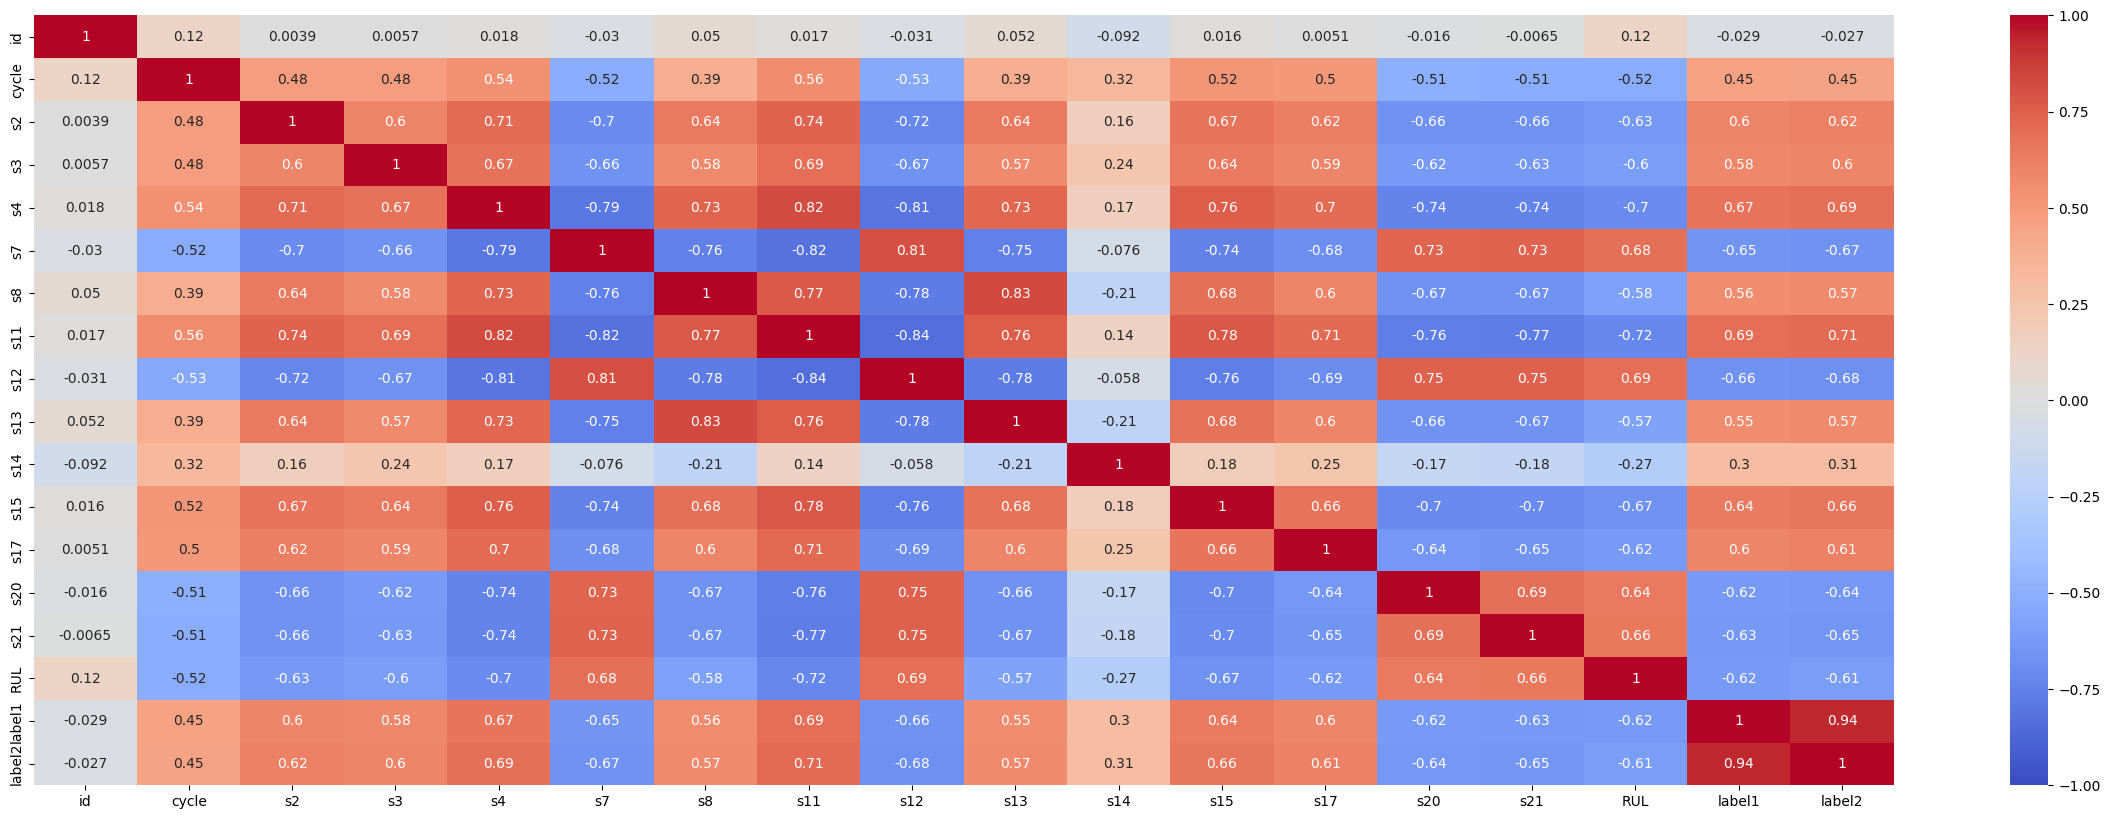

In [10]:
plt.figure(figsize=[30,10])
sns.heatmap (df_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

In [11]:
# Imagina que df es tu DataFrame original
features = df.drop(columns=['id','RUL','label1','label2'])
X = features.values



Escalar es clave porque K‑Means usa distancias euclídeas y es sensible a las escalas de los valores

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Determinar el número óptimo de clusters (k)
Elbow Method
Calcula la inercia (WCSS) para distintos valores de k y busca el "codo" en la gráfica:

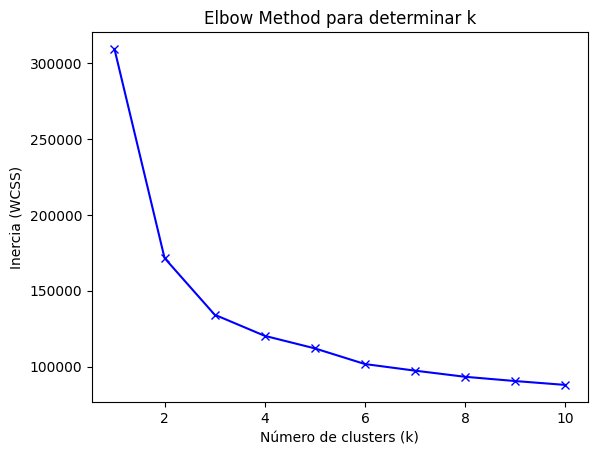

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (WCSS)')
plt.title('Elbow Method para determinar k')
plt.show()


La inercia es la suma de distancias al centro de cada cluster y permite identificar el punto donde deja de mejorar significativamente

b) Silhouette Score (opcional pero recomendado)
El unicidad y cohesión de cada cluster se mide con el Silhouette Score:

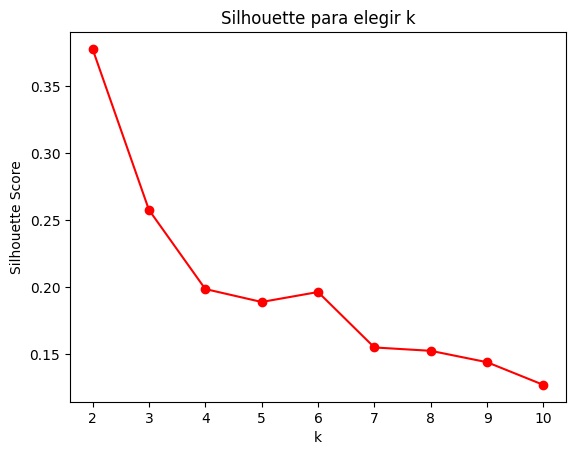

In [14]:
from sklearn.metrics import silhouette_score

sil = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    labels = km.fit_predict(X_scaled)
    sil.append(silhouette_score(X_scaled, labels))

plt.plot(K, sil, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette para elegir k')
plt.show()


Se scoge el k con mayor puntuación —Clusters bien definidos combinan alta cohesión y buen separación

Ajustar el modelo final
Asumiendo que elijas k_opt según los análisis:

In [ ]:
k_opt = 4  

kmeans = KMeans(n_clusters=k_opt, random_state=0, n_init='auto')
cluster_labels = kmeans.fit_predict(X_scaled)

df['cluster'] = cluster_labels


Se añade la columna cluster al DataFrame para analizar cómo se comportan las características y RUL en cada grupo.

Visualización en 2D con PCA

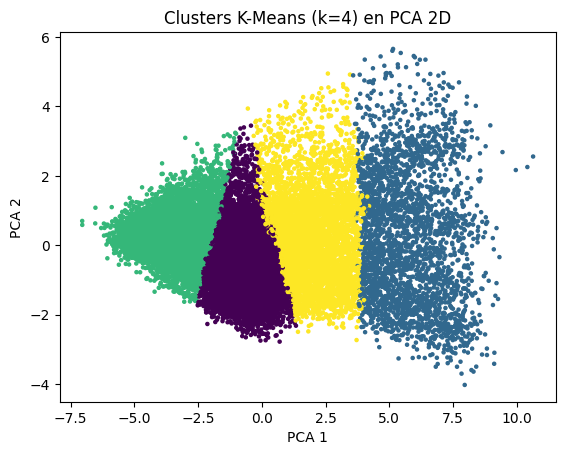

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='viridis', s=5)
plt.title(f'Clusters K-Means (k={k_opt}) en PCA 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [ ]:
import pandas as pd

ct = df.groupby('cluster')['label2'].value_counts().unstack(fill_value=0)
print(ct)

# proporciones:
prop = ct.div(ct.sum(axis=1), axis=0)
print(prop)


label2      0    1     2
cluster                 
0        7071    0     0
1         379  871  1578
2        6009    0     0
3        4072  629    22
label2          0         1         2
cluster                              
0        1.000000  0.000000  0.000000
1        0.134017  0.307992  0.557992
2        1.000000  0.000000  0.000000
3        0.862164  0.133178  0.004658


Los clusters 0 y 2 contienen solo label2 = 0 (100 %), lo que indica alta pureza para esa clase.

El cluster 1 es mixto, dominado por label2 = 2 (≈56 %), seguido por label2 = 1 (~31%) y unos pocos label2 = 0 (~13%).

El cluster 3 también está enfocado en label2 = 0 (~86 %) pero incluye algunos casos de label2 = 1 y muy pocos de label2 = 2.

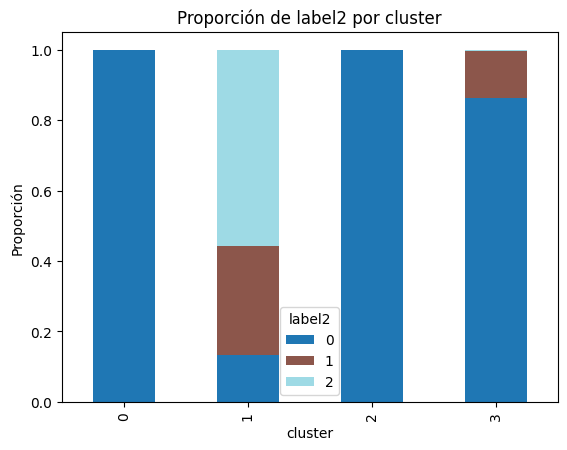

In [18]:
prop.plot(kind='bar', stacked=True, colormap='tab20')
plt.ylabel('Proporción')
plt.title('Proporción de label2 por cluster')
plt.legend(title='label2')
plt.show()


In [17]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df['cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.19872074655076027


Un Silhouette Score de 0.1987 indica una calidad de agrupamiento bastante baja. Para interpretar este valor, te explico cómo funciona la métrica:



In [19]:
joblib.dump(kmeans, '../models/modelo_kmeans.pkl')

['../models/modelo_kmeans.pkl']